# **Data Analysis Notebook**

## Objectives

* This notebook will be used to test the dataset for use going forward

## Inputs

* We will use the BitCoinVsMacroNasdaq_v2 dataset saved within outputs/datasets/collection

## Outputs

* Create the train and test datasets from the cleaned and tested dataset

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Project5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Project5'

---

# Analyse combined dataset

### Load the data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BitCoinVsMacroNasdaq_v3.csv"))
df.head()

,Date,BitCoin_Close,BTC_Close_Lag1,BTC_Close_RollingMean3,Nasdaq_Lag1,Nasdaq_Volume_Lag1,VIX_Lag1,ExchangeRate_Lag1,SOFR_Lag1,Gold_Lag1,Oil_Lag1,CPI_Lag1,Inflation_Lag1,M2_Lag1,TEDSpread_Lag1,TreasuryYield_Lag1,FedFundsRate_Lag1
0,2018-05-01,9240.335679,9413.409305,9307.424274,29.440001,2580900.0,15.93,1.2074,1.77,1316.199951,68.570000,250.227,2.470996,13993.9,0.52,2.87,1.69
1,2018-05-02,9096.810022,9240.335679,9250.185002,29.670000,2063100.0,15.49,1.2000,1.76,1303.800049,67.250000,250.227,2.470996,13993.9,0.52,2.87,1.69
2,2018-05-03,9236.704389,9096.810022,9191.283363,29.303333,4036800.0,15.97,1.1968,1.75,1302.599976,67.930000,250.227,2.470996,13993.9,0.52,2.87,1.69
3,2018-05-04,9769.290293,9236.704389,9367.601568,28.670000,5250000.0,15.90,1.1970,1.74,1310.699951,68.430000,250.227,2.470996,13993.9,0.52,2.87,1.69
4,2018-05-07,9666.853489,9769.290293,9557.616057,29.233334,3045900.0,14.77,1.1946,1.72,1312.699951,69.720001,250.227,2.470996,13993.9,0.52,2.87,1.69


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

Check BitCoin price history and distribution

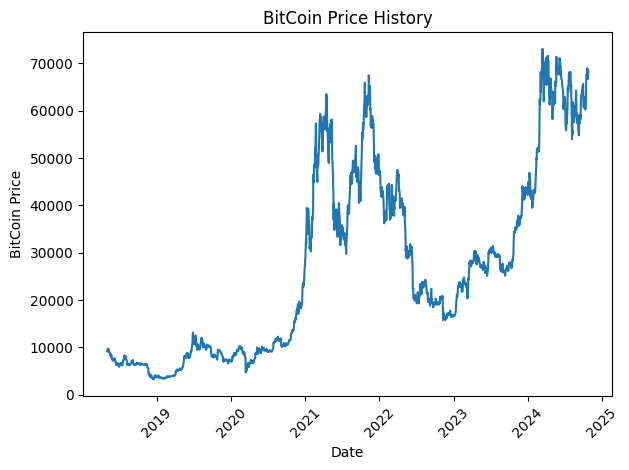

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="Date", y="BitCoin_Close")

plt.title("BitCoin Price History")
plt.xlabel("Date")
plt.ylabel("BitCoin Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


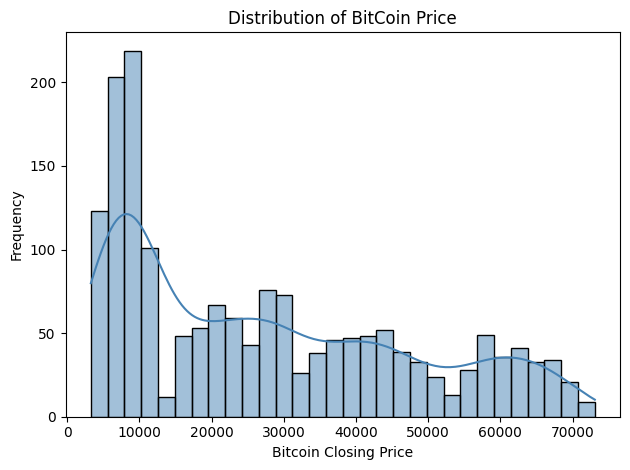

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="BitCoin_Close", kde=True, bins=30, color="steelblue")

plt.title("Distribution of BitCoin Price")
plt.xlabel("Bitcoin Closing Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


---

# Perform correlation & PPS review

Ideally we would like to see correlated values above 0.70

In [8]:
corr_spearman = df.corr(method='spearman', numeric_only=True)['BitCoin_Close'].drop('BitCoin_Close').apply(abs).sort_values(ascending=False).head(10)
corr_spearman

BTC_Close_RollingMean3    0.998985
BTC_Close_Lag1            0.998173
Nasdaq_Lag1               0.842912
CPI_Lag1                  0.799107
Gold_Lag1                 0.782798
TEDSpread_Lag1            0.761076
M2_Lag1                   0.715122
Oil_Lag1                  0.542719
Inflation_Lag1            0.464626
TreasuryYield_Lag1        0.233581
Name: BitCoin_Close, dtype: float64

In [9]:
corr_pearson = df.corr(method='pearson', numeric_only=True)['BitCoin_Close'].drop('BitCoin_Close').apply(abs).sort_values(ascending=False).head(10)
corr_pearson

BTC_Close_RollingMean3    0.998871
BTC_Close_Lag1            0.997908
Nasdaq_Lag1               0.809292
Gold_Lag1                 0.777850
M2_Lag1                   0.728533
CPI_Lag1                  0.661845
TEDSpread_Lag1            0.491048
Oil_Lag1                  0.457550
Inflation_Lag1            0.283846
TreasuryYield_Lag1        0.282208
Name: BitCoin_Close, dtype: float64

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()

def CalculateCorrAndPPS(df):
    corr_spearman = df.corr(method="spearman", numeric_only=True)
    corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return corr_pearson, corr_spearman, pps_matrix

def DisplayCorrAndPPS(corr_pearson, corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    heatmap_corr(df=corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    heatmap_corr(df=corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [11]:
corr_pearson, corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dt

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min   25%    50%    75%  max
ppscore  272.0  0.464  0.373  0.0  0.05  0.455  0.865  1.0




*** Heatmap: Spearman Correlation ***


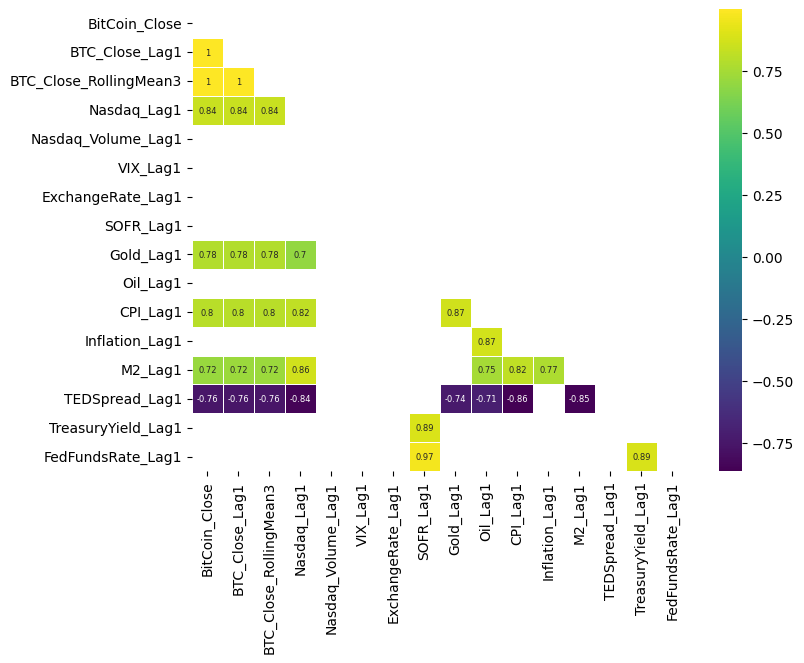



*** Heatmap: Pearson Correlation ***


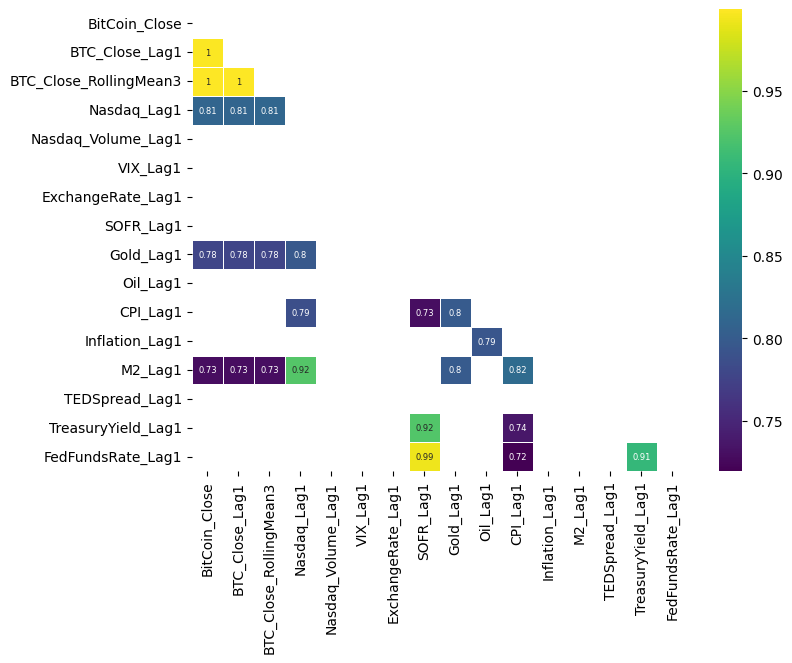



*** Heatmap: Power Predictive Score (PPS) ***


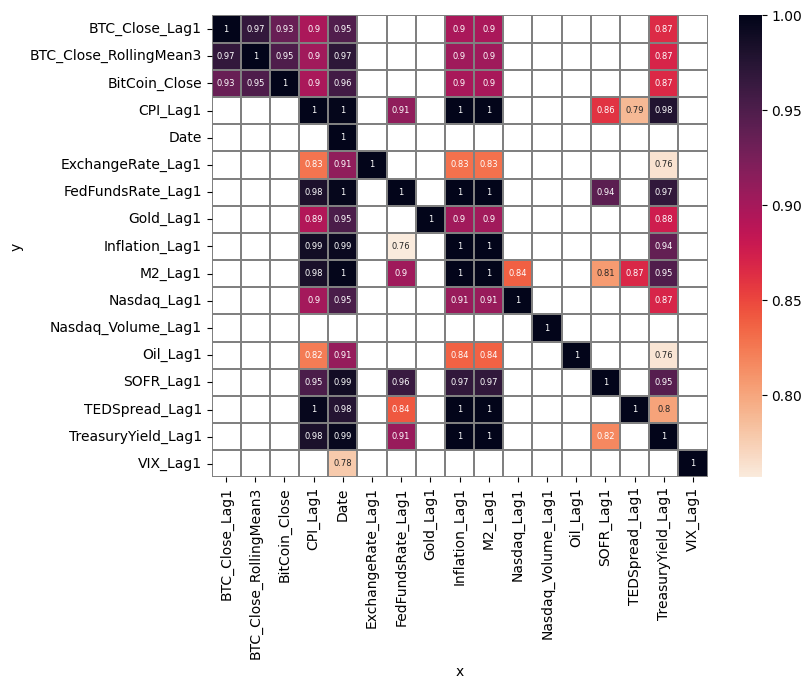

In [12]:
DisplayCorrAndPPS(corr_pearson = corr_pearson,
                  corr_spearman = corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.7, PPS_Threshold =0.75,
                  figsize=(8,6), font_annot=6)

## Correlation and PPS summary:

### Spearman
Under the Spearman monotonic relationship, the following observations are made:
* BitCoin seems to track the Nasdaq closely suggesting a strong correlation to tech stocks
* Inflation (CPI) and Money Supply (M2) have a strong correlation to BitCoin
* Gold is similar in movement to BitCoin
* TEDSpread (credit risk) suggests BitCoin may coincide with higher credit risk
* Correlated threshold was set to 0.70

### Pearson
Under the Pearson linear relationship, the following observations are made:
* BitCoin seems to track the Nasdaq closely suggesting a strong correlation to tech stocks
* Gold is similar in movement to BitCoin
* Inflation (CPI) and Money Supply (M2) have a strong correlation to BitCoin, albeit less than under Spearman
* Interestingly, TEDSpread is not as hightly correlated under the Pearson method
* Correlated threshold was set to 0.70

### PPS
The below were observed under Predictive Power Score:
* The upper quartile show some strong predictors
* The 10yr Treasury Yield, Inflation Rate & Money Supply (M2) scored the highest under PPS
* PPS threshold was set to 0.75 due to the upper quartile results

---

# Reduce dataset to only relevant features after analysis

Given that we only have a number of features that are highly correlated or have a high PPS, we will keep those moving forward and drop the others

In [13]:
df_cleaned = df[
    ["Date",
    "BitCoin_Close",
    "BTC_Close_RollingMean3",
    "BTC_Close_Lag1",
    "Nasdaq_Lag1",
    "CPI_Lag1",
    "Gold_Lag1",
    "TEDSpread_Lag1",
    "M2_Lag1",
    "Inflation_Lag1",
    "TreasuryYield_Lag1"]]
df_cleaned.head()

,Date,BitCoin_Close,BTC_Close_RollingMean3,BTC_Close_Lag1,Nasdaq_Lag1,CPI_Lag1,Gold_Lag1,TEDSpread_Lag1,M2_Lag1,Inflation_Lag1,TreasuryYield_Lag1
0,2018-05-01,9240.335679,9307.424274,9413.409305,29.440001,250.227,1316.199951,0.52,13993.9,2.470996,2.87
1,2018-05-02,9096.810022,9250.185002,9240.335679,29.670000,250.227,1303.800049,0.52,13993.9,2.470996,2.87
2,2018-05-03,9236.704389,9191.283363,9096.810022,29.303333,250.227,1302.599976,0.52,13993.9,2.470996,2.87
3,2018-05-04,9769.290293,9367.601568,9236.704389,28.670000,250.227,1310.699951,0.52,13993.9,2.470996,2.87
4,2018-05-07,9666.853489,9557.616057,9769.290293,29.233334,250.227,1312.699951,0.52,13993.9,2.470996,2.87


---

# Push Train and Test datasets to the repo

Create the Outputs folder and save the Train and Test datasets in 'cleaned'

In [14]:
import os
try:
  os.makedirs(name='outputs/datasets/train_test_initial')
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/train_test_initial'


In [15]:
df_cleaned = df[
    ["Date",
    "BitCoin_Close",
    "BTC_Close_RollingMean3",
    "BTC_Close_Lag1",
    "Nasdaq_Lag1",
    "CPI_Lag1",
    "Gold_Lag1",
    "TEDSpread_Lag1",
    "M2_Lag1",
    "Inflation_Lag1",
    "TreasuryYield_Lag1"]].copy()

df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
df_cleaned = df_cleaned.sort_values("Date")
df_cleaned.head()

,Date,BitCoin_Close,BTC_Close_RollingMean3,BTC_Close_Lag1,Nasdaq_Lag1,CPI_Lag1,Gold_Lag1,TEDSpread_Lag1,M2_Lag1,Inflation_Lag1,TreasuryYield_Lag1
0,2018-05-01,9240.335679,9307.424274,9413.409305,29.440001,250.227,1316.199951,0.52,13993.9,2.470996,2.87
1,2018-05-02,9096.810022,9250.185002,9240.335679,29.670000,250.227,1303.800049,0.52,13993.9,2.470996,2.87
2,2018-05-03,9236.704389,9191.283363,9096.810022,29.303333,250.227,1302.599976,0.52,13993.9,2.470996,2.87
3,2018-05-04,9769.290293,9367.601568,9236.704389,28.670000,250.227,1310.699951,0.52,13993.9,2.470996,2.87
4,2018-05-07,9666.853489,9557.616057,9769.290293,29.233334,250.227,1312.699951,0.52,13993.9,2.470996,2.87


Split the dataset into Train and Test

In [16]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df_cleaned.drop(['BitCoin_Close', 'Date'], axis=1),
    df_cleaned['BitCoin_Close'],
    test_size=0.2,
    shuffle=False,
    random_state=0
)

print(f"features_train shape: {features_train.shape} \nfeatures_test shape: {features_test.shape}")
print(f"target_train shape: {target_train.shape} \ntarget_test shape: {target_test.shape}")


features_train shape: (1355, 9) 
features_test shape: (339, 9)
target_train shape: (1355,) 
target_test shape: (339,)


Perform a final check on the train and test datasets for missing data

In [17]:
def check_missing_values(X_train, X_test, y_train, y_test):
    print('Missing Values Summary:\n')
    for name, df in zip(
        ['features_train', 'features_test', 'target_train', 'target_test'],
        [X_train, X_test, y_train, y_test]
    ):
        print(f"{name}:")
        print(df.isnull().sum())
        print()

check_missing_values(features_train, features_test, target_train, target_test)

Missing Values Summary:

features_train:
BTC_Close_RollingMean3    0
BTC_Close_Lag1            0
Nasdaq_Lag1               0
CPI_Lag1                  0
Gold_Lag1                 0
TEDSpread_Lag1            0
M2_Lag1                   0
Inflation_Lag1            0
TreasuryYield_Lag1        0
dtype: int64

features_test:
BTC_Close_RollingMean3    0
BTC_Close_Lag1            0
Nasdaq_Lag1               0
CPI_Lag1                  0
Gold_Lag1                 0
TEDSpread_Lag1            0
M2_Lag1                   0
Inflation_Lag1            0
TreasuryYield_Lag1        0
dtype: int64

target_train:
0

target_test:
0



In [18]:
features_train.to_csv("outputs/datasets/train_test_initial/features_train.csv", index=False)

In [19]:
features_test.to_csv("outputs/datasets/train_test_initial/features_test.csv", index=False)

In [20]:
target_train.to_csv("outputs/datasets/train_test_initial/target_train.csv", index=False)

In [21]:
target_test.to_csv("outputs/datasets/train_test_initial/target_test.csv", index=False)

We will also save the BitCoin price history, BitCoin distribution, Spearman and PPS heatmaps from above.

In [22]:
import os
try:
  os.makedirs(name='outputs/datasets/figs')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/figs'


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="Date", y="BitCoin_Close")
plt.title("BitCoin Price History")
plt.xlabel("Date")
plt.ylabel("BitCoin Price")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/datasets/figs/bitcoin_price_history.png", dpi=300, bbox_inches='tight')
plt.close()


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="BitCoin_Close", kde=True, bins=30, color="steelblue")

plt.title("Distribution of BitCoin Price")
plt.xlabel("Bitcoin Closing Price")
plt.ylabel("Frequency")
plt.tight_layout()

plt.savefig("outputs/datasets/figs/bitcoin_distribution.png", dpi=300, bbox_inches='tight')
plt.close()